# Experiments for the Eikonal equation in a d-dimensional annulus

In [1]:
import torch.optim as optim
import matplotlib.pyplot as plt
import torch
import numpy as np
from time import time as t

import sys
# setting path
sys.path.append('../')

from visualization.plots_disc import plot_2d_proj_disc
from Hamiltonians.Eikonal_LxF import Eikonal_sq_LF_multiD
from PointSampling.Ball import data_gen_ball, data_gen_ball_unif
from NeuralNetworks.NNs import FCFF_3L, FCFF_4L

#Right-hand-side of the PDE
def f(X):    
    return 1

#Boundary condition
def g(X):    
    return 0


training_params = {
    'numerical_scheme': Eikonal_sq_LF_multiD,

    'f': f,
    'g': g,
    'c': None,
    
    'beta': 0.,  ## parameter for the +u_i term
    
    'lambda': 1. #weight parameter for the boundary loss
    }

n_experiments_rep = 10

In [2]:
# Dimension of the d-dimensional ball for each experiment
dim_list = 3*[5] + 3*[10]
# Architecture in each experiment
arch_list = [[40,40],
             [40,40,40],
             [40,40,40],
             [60,60],
             [60,60,60],
             [60,60,60]]
# Sampling distribution
# 0: uniform distribution
# 1: radially uniform distribution
distr_list = 6*[1]


n_experiments = len(dim_list)
radii = [6., 2.]

# Parameters for each experiment
delta_list = [[.7, .3, .1, .05]]*n_experiments
alpha_list = [[2.5, 2., 1., .5]]*n_experiments
rounds = len(delta_list[0])

N_col_list = [[200]*rounds]*n_experiments
N_b_list = [[80]*rounds]*n_experiments


num_iterations_list = [[1500, 1500, 1500, 1500],
                       [1500, 1500, 1500, 1500],
                       [1500, 2000, 2500, 3000],
                       [2500, 2500, 2500, 2500],
                       [2500, 2500, 2500, 2500],
                       [2500, 3000, 3500, 5000]]

100%|██████████| 1500/1500 [00:15<00:00, 94.41it/s]
C:\Users\usuario\anaconda3\envs\FD_PINNs\Lib\site-packages\torch\functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3596.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


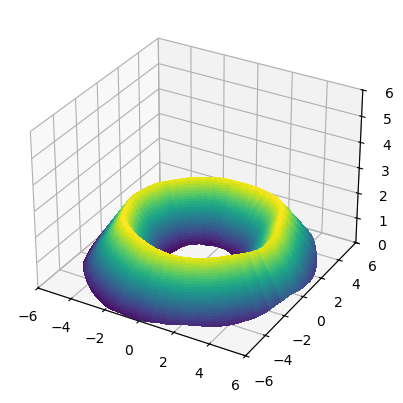

100%|██████████| 1500/1500 [00:15<00:00, 97.39it/s] 


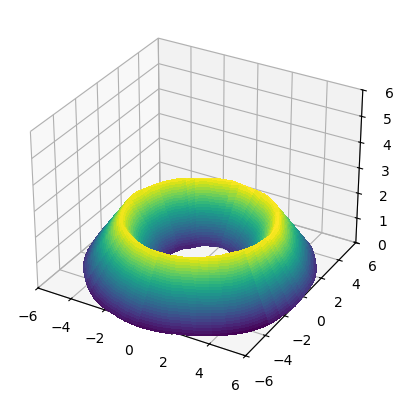

100%|██████████| 1500/1500 [00:16<00:00, 93.38it/s] 


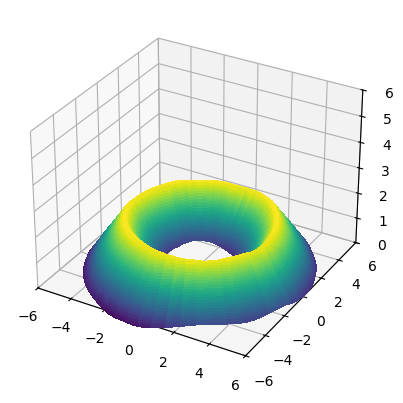

100%|██████████| 1500/1500 [00:15<00:00, 93.89it/s] 


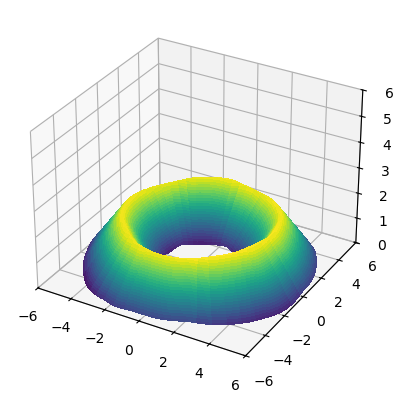

100%|██████████| 1500/1500 [00:14<00:00, 104.67it/s]


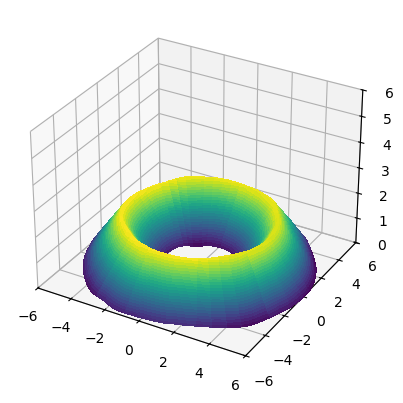

100%|██████████| 1500/1500 [00:15<00:00, 97.36it/s] 


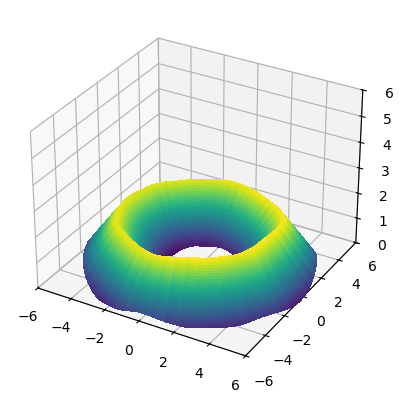

100%|██████████| 1500/1500 [00:16<00:00, 93.23it/s] 


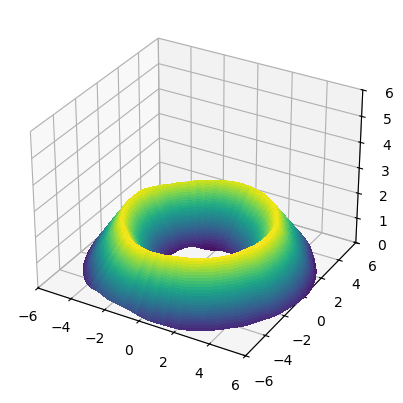

100%|██████████| 1500/1500 [00:16<00:00, 93.10it/s] 


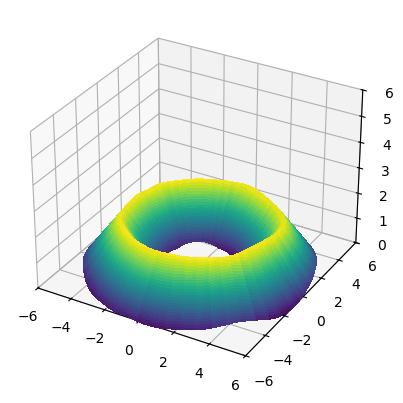

100%|██████████| 1500/1500 [00:16<00:00, 92.89it/s] 


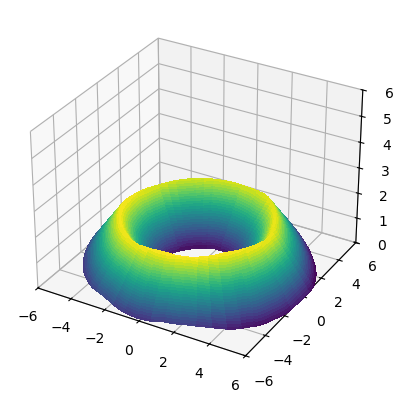

100%|██████████| 1500/1500 [00:15<00:00, 95.00it/s] 


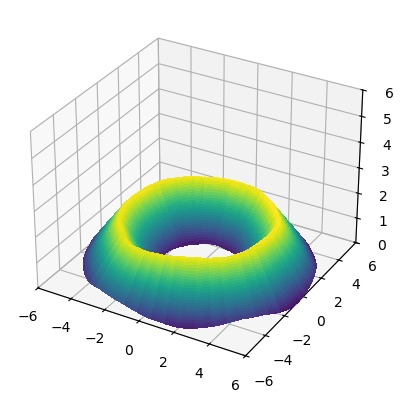

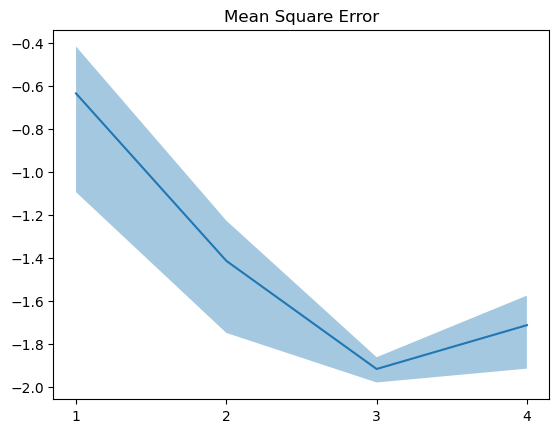

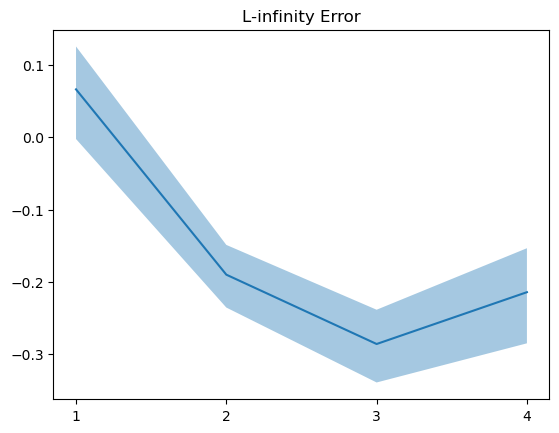

100%|██████████| 1500/1500 [00:22<00:00, 65.48it/s]


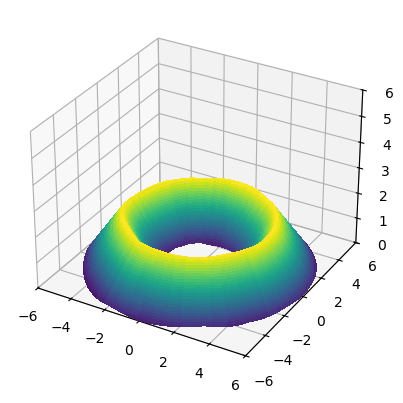

100%|██████████| 1500/1500 [00:23<00:00, 62.97it/s]


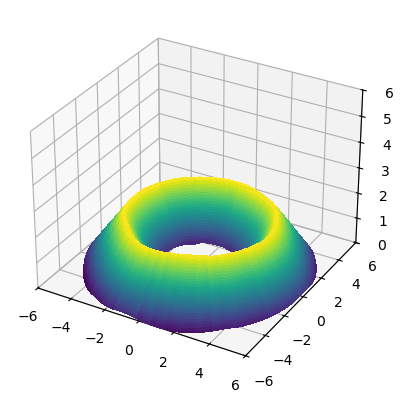

100%|██████████| 1500/1500 [00:23<00:00, 63.91it/s]


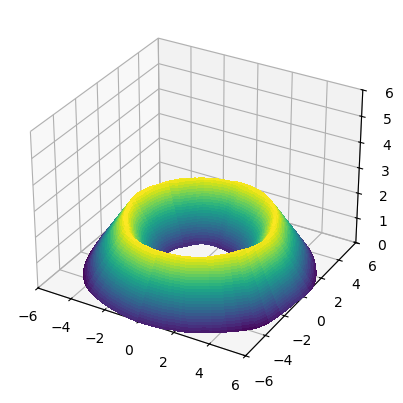

100%|██████████| 1500/1500 [00:21<00:00, 68.42it/s]


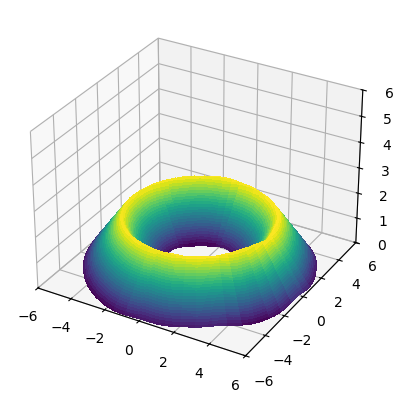

100%|██████████| 1500/1500 [00:22<00:00, 65.83it/s]


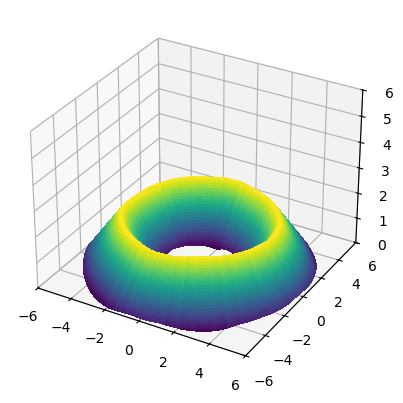

100%|██████████| 1500/1500 [00:22<00:00, 67.42it/s]


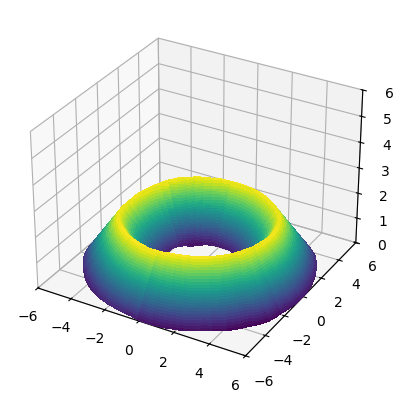

100%|██████████| 1500/1500 [00:23<00:00, 64.26it/s]


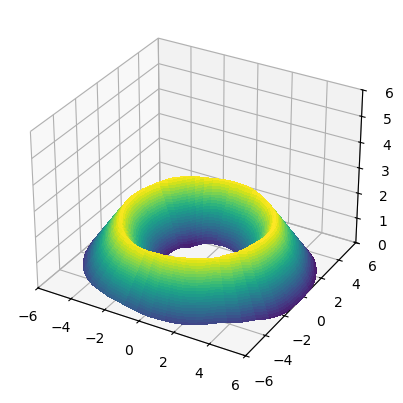

100%|██████████| 1500/1500 [00:20<00:00, 71.70it/s]


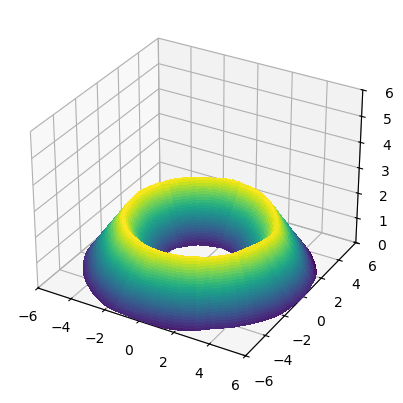

100%|██████████| 1500/1500 [00:22<00:00, 66.31it/s]


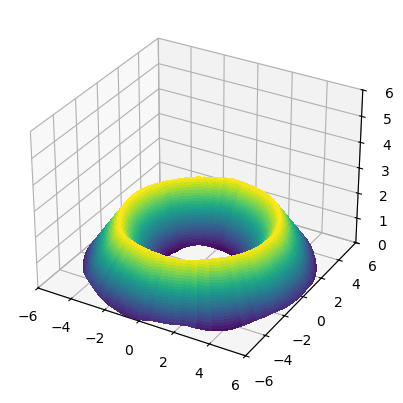

100%|██████████| 1500/1500 [00:22<00:00, 66.93it/s]


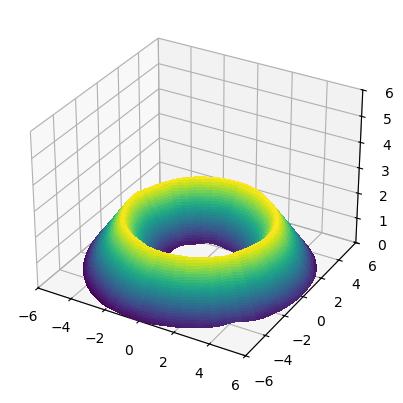

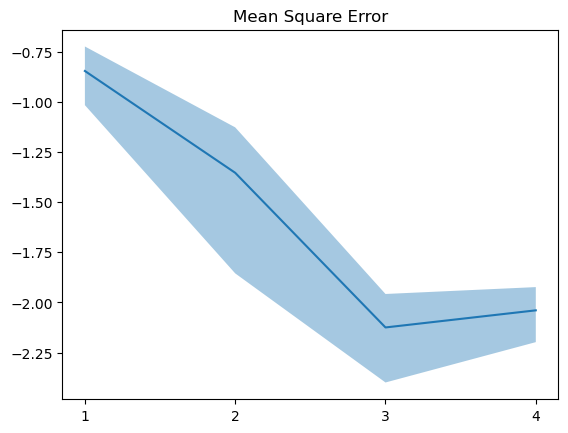

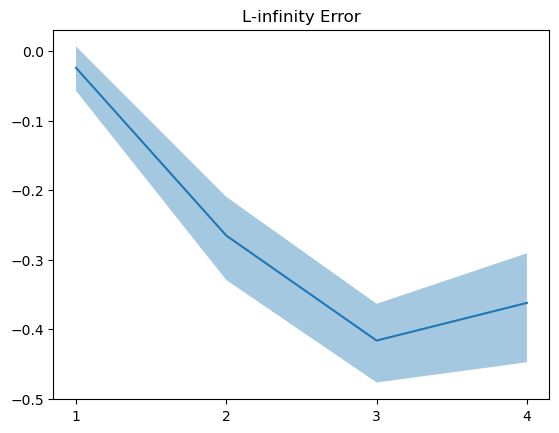

100%|██████████| 3000/3000 [00:46<00:00, 64.82it/s]


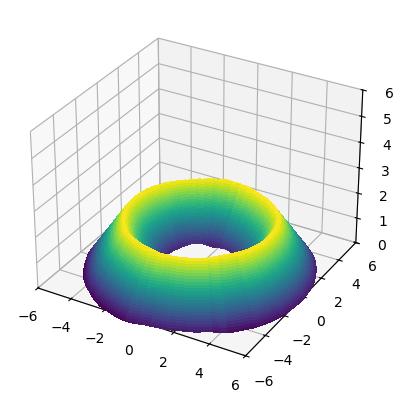

100%|██████████| 3000/3000 [00:44<00:00, 67.03it/s]


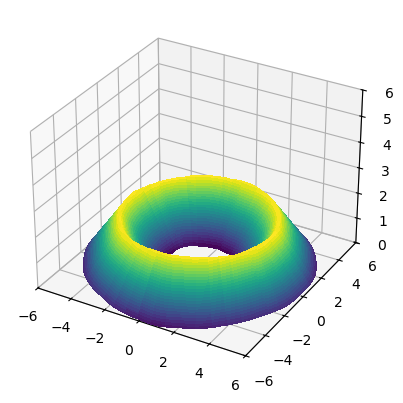

100%|██████████| 3000/3000 [00:45<00:00, 65.84it/s]


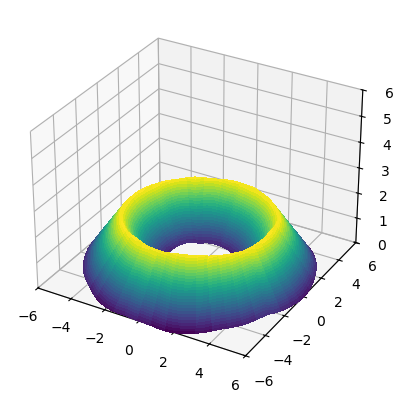

100%|██████████| 3000/3000 [00:42<00:00, 69.89it/s] 


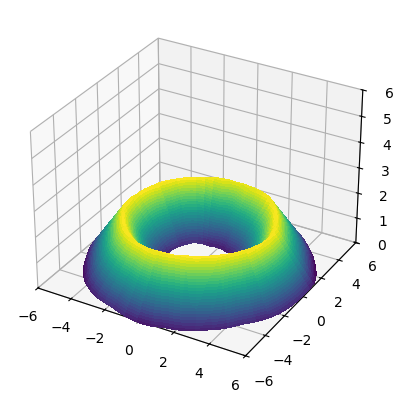

100%|██████████| 3000/3000 [00:46<00:00, 64.85it/s]


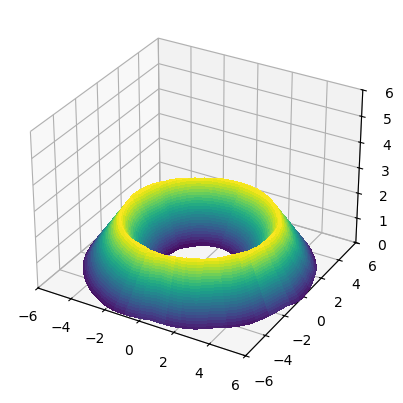

100%|██████████| 3000/3000 [00:46<00:00, 63.84it/s]


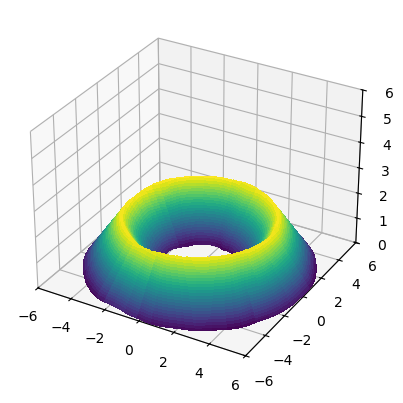

100%|██████████| 3000/3000 [00:42<00:00, 69.99it/s]


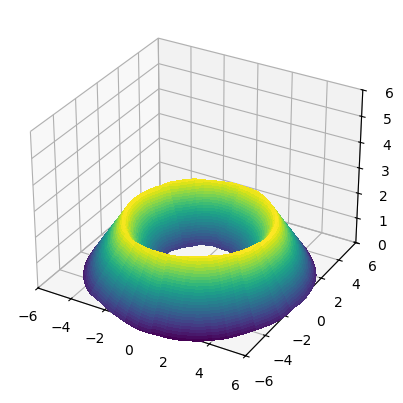

100%|██████████| 3000/3000 [00:44<00:00, 66.70it/s]


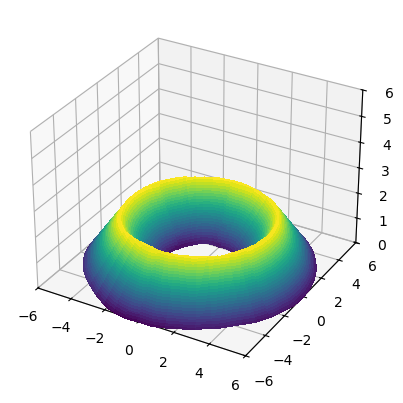

100%|██████████| 3000/3000 [00:46<00:00, 64.58it/s]


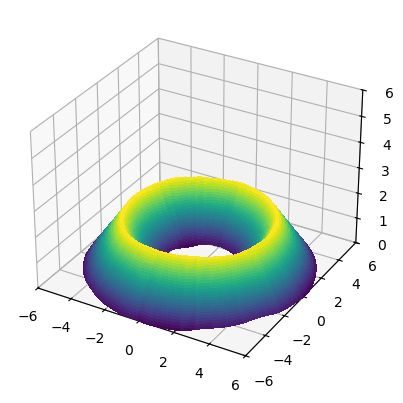

100%|██████████| 3000/3000 [00:44<00:00, 67.21it/s]


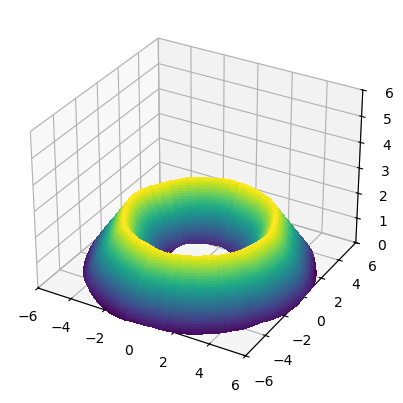

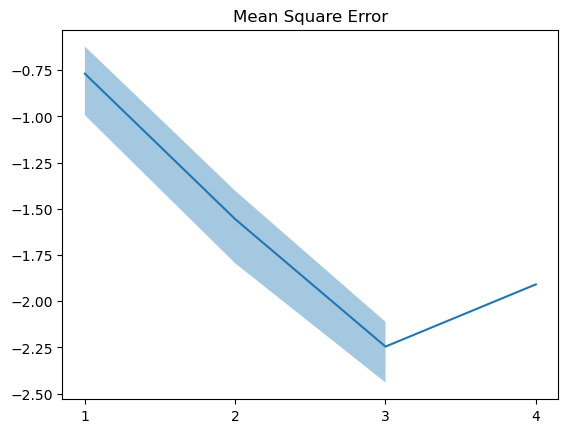

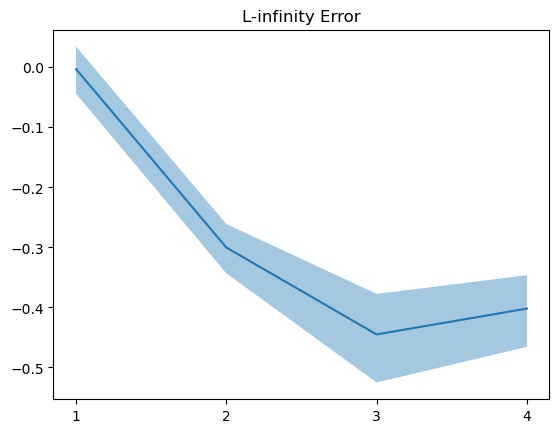

100%|██████████| 2500/2500 [00:20<00:00, 122.95it/s]


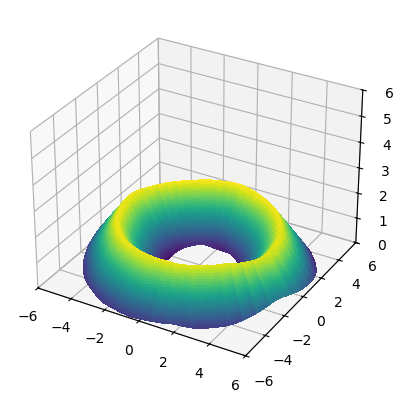

100%|██████████| 2500/2500 [00:17<00:00, 139.12it/s]


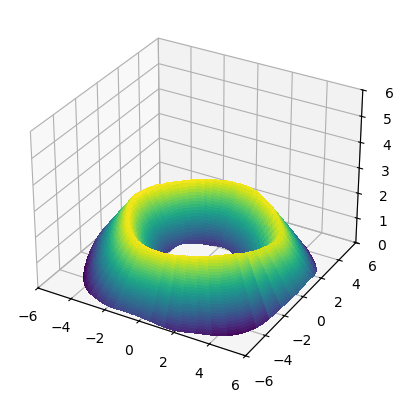

100%|██████████| 2500/2500 [00:20<00:00, 122.71it/s]


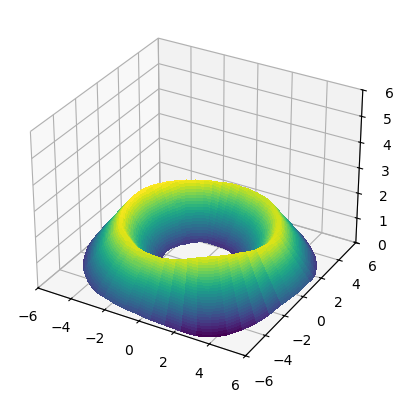

100%|██████████| 2500/2500 [00:20<00:00, 120.54it/s]


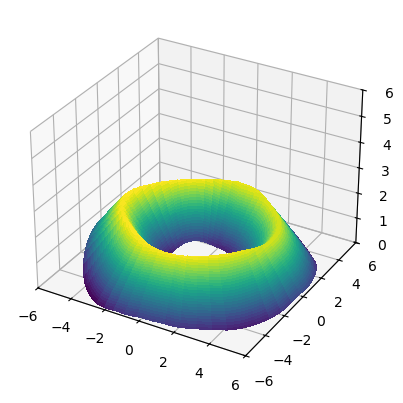

100%|██████████| 2500/2500 [00:25<00:00, 98.42it/s] 


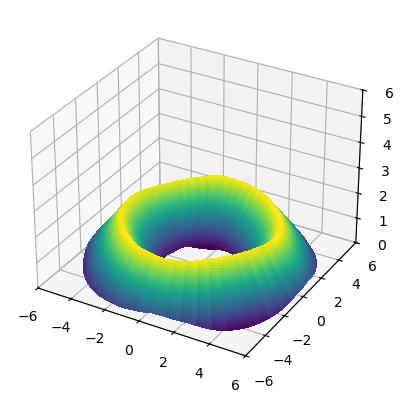

100%|██████████| 2500/2500 [00:17<00:00, 141.36it/s]


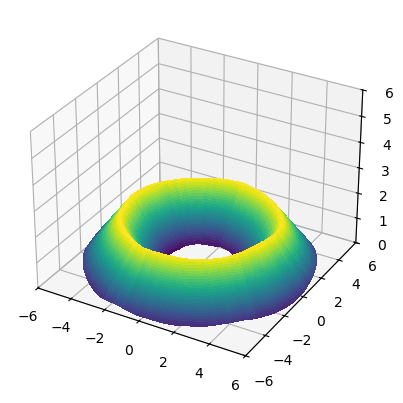

100%|██████████| 2500/2500 [00:17<00:00, 144.34it/s]


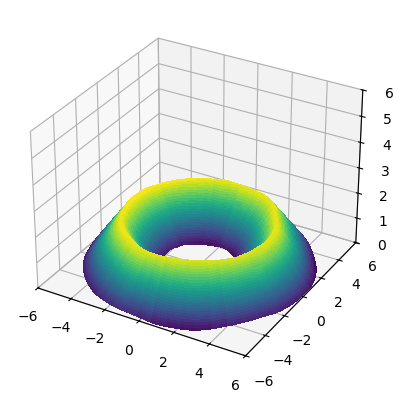

100%|██████████| 2500/2500 [00:20<00:00, 119.07it/s]


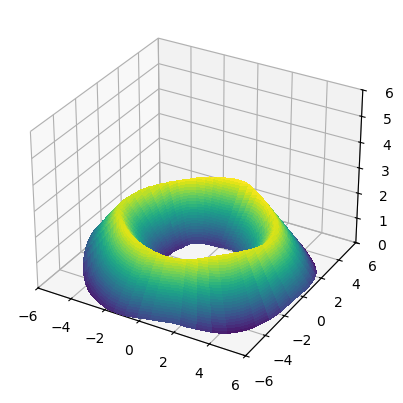

100%|██████████| 2500/2500 [00:23<00:00, 107.24it/s]


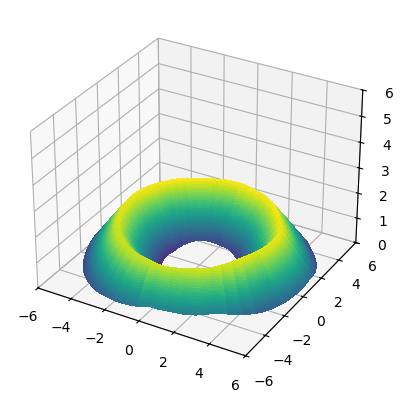

100%|██████████| 2500/2500 [00:17<00:00, 140.24it/s]


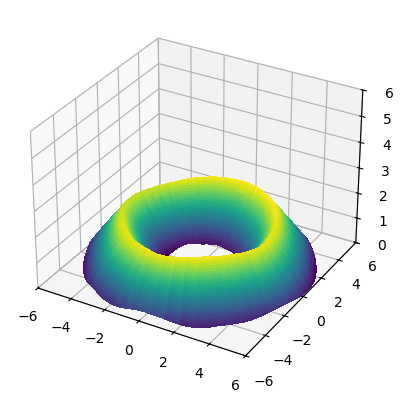

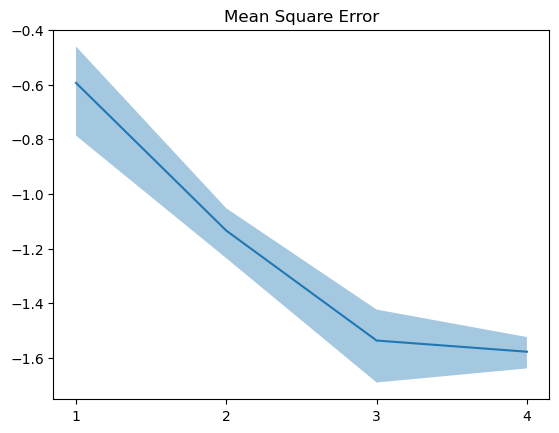

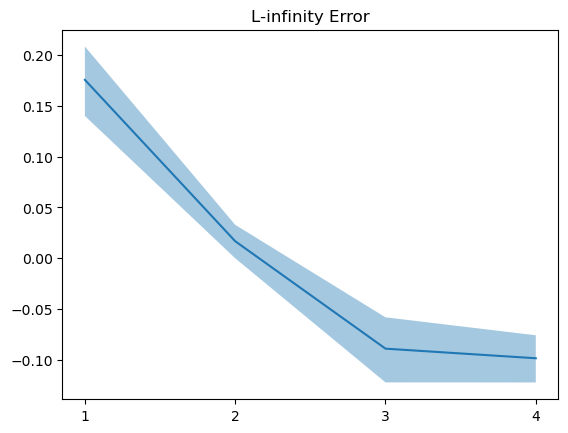

100%|██████████| 2500/2500 [00:23<00:00, 107.43it/s]


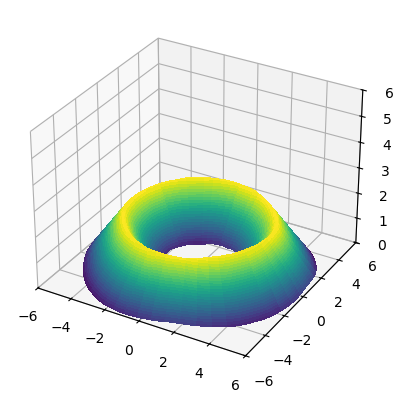

100%|██████████| 2500/2500 [00:27<00:00, 89.71it/s]


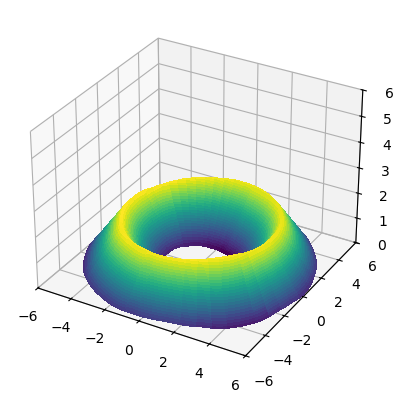

100%|██████████| 2500/2500 [00:29<00:00, 84.89it/s] 


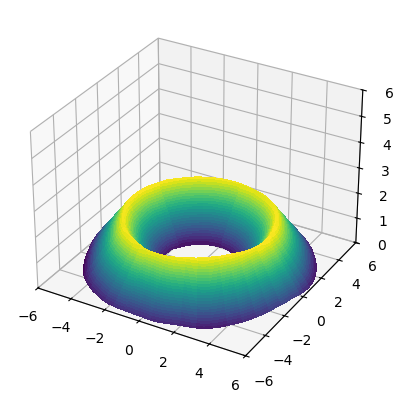

100%|██████████| 2500/2500 [00:23<00:00, 106.75it/s]


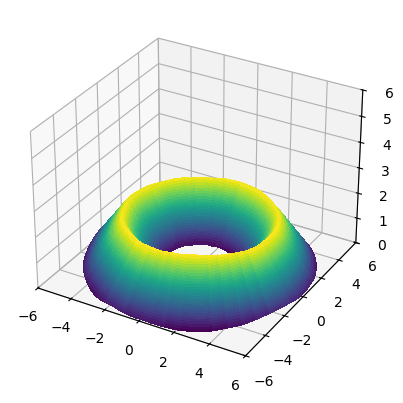

100%|██████████| 2500/2500 [00:26<00:00, 95.68it/s] 


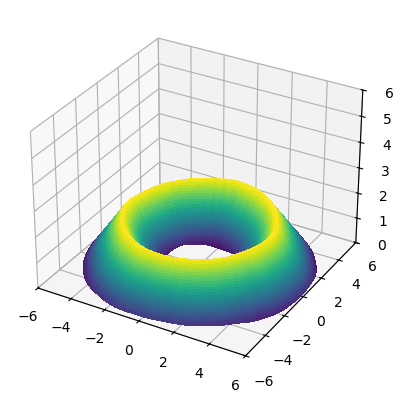

100%|██████████| 2500/2500 [00:27<00:00, 91.36it/s] 


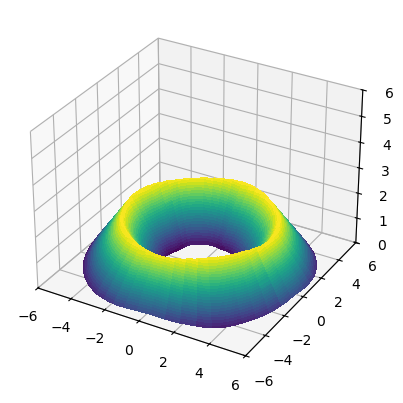

100%|██████████| 2500/2500 [00:23<00:00, 108.43it/s]


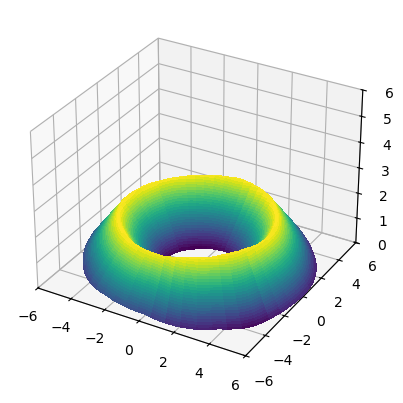

100%|██████████| 2500/2500 [00:23<00:00, 104.52it/s]


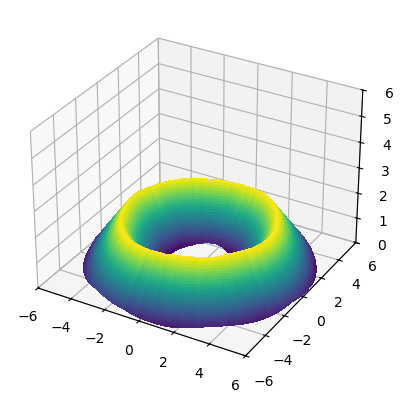

100%|██████████| 2500/2500 [00:28<00:00, 88.26it/s]


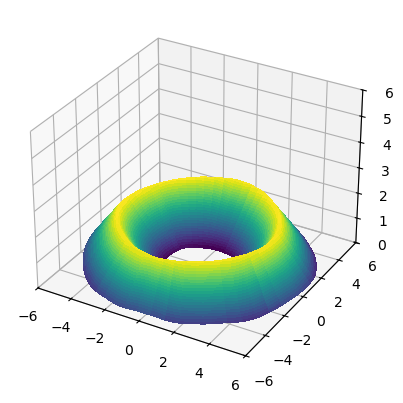

100%|██████████| 2500/2500 [00:27<00:00, 89.74it/s] 


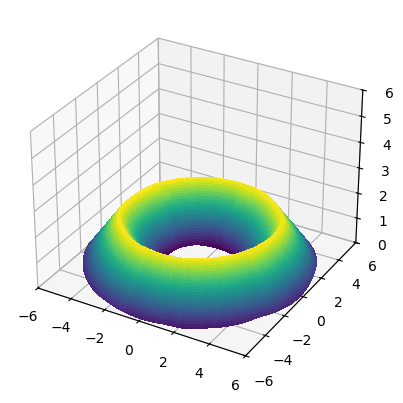

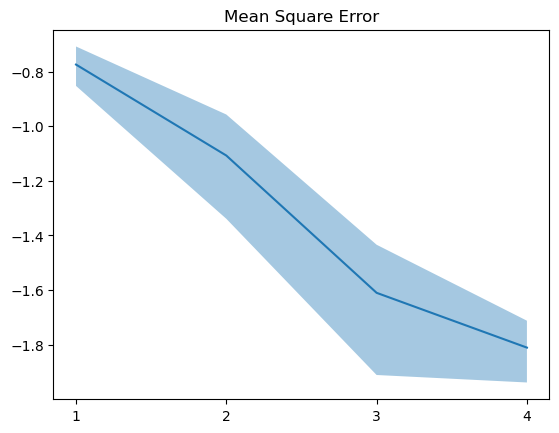

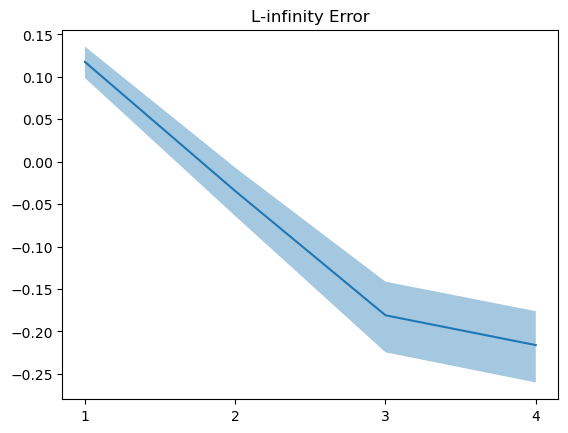

100%|██████████| 5000/5000 [00:47<00:00, 106.02it/s]


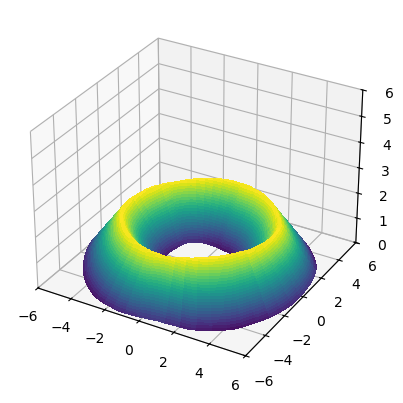

100%|██████████| 5000/5000 [00:53<00:00, 93.09it/s] 


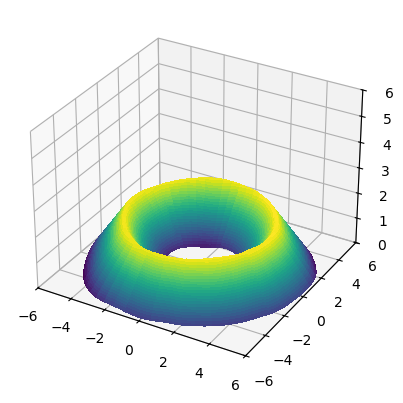

100%|██████████| 5000/5000 [00:46<00:00, 108.06it/s]


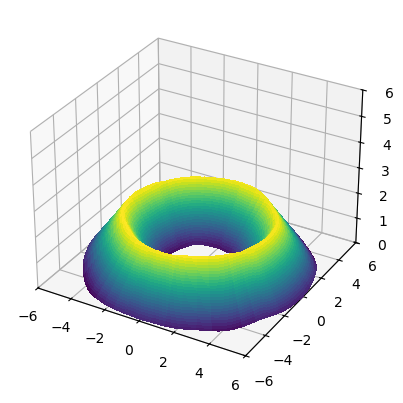

100%|██████████| 5000/5000 [00:51<00:00, 96.92it/s] 


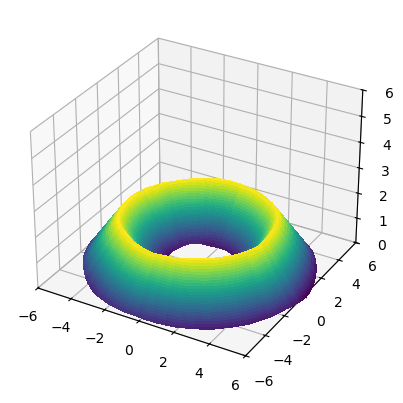

100%|██████████| 5000/5000 [00:48<00:00, 102.18it/s]


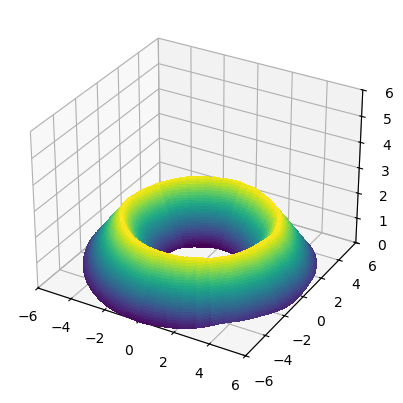

100%|██████████| 5000/5000 [00:43<00:00, 114.59it/s]


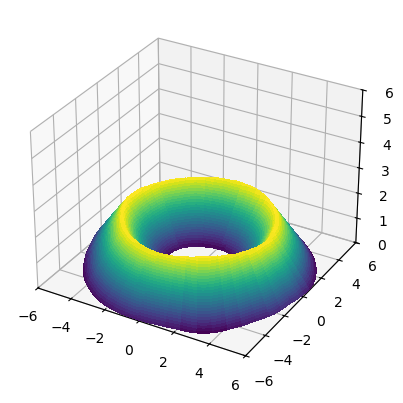

100%|██████████| 5000/5000 [00:52<00:00, 95.13it/s] 


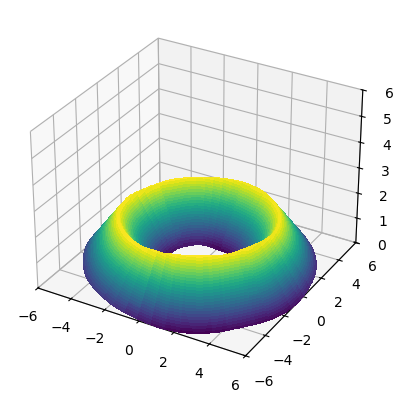

100%|██████████| 5000/5000 [00:45<00:00, 110.89it/s]


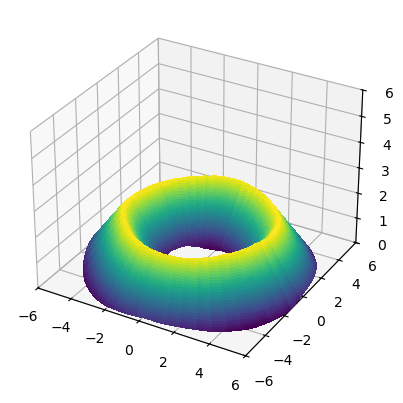

100%|██████████| 5000/5000 [00:46<00:00, 106.41it/s]


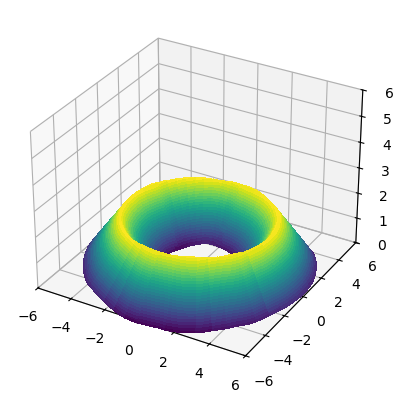

100%|██████████| 5000/5000 [00:49<00:00, 101.14it/s]


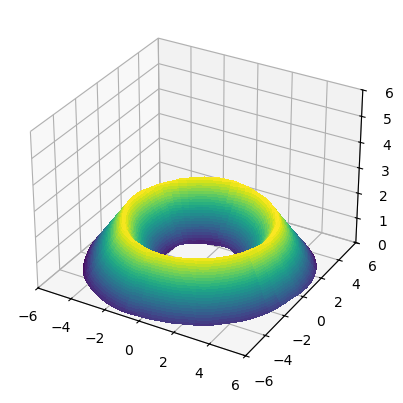

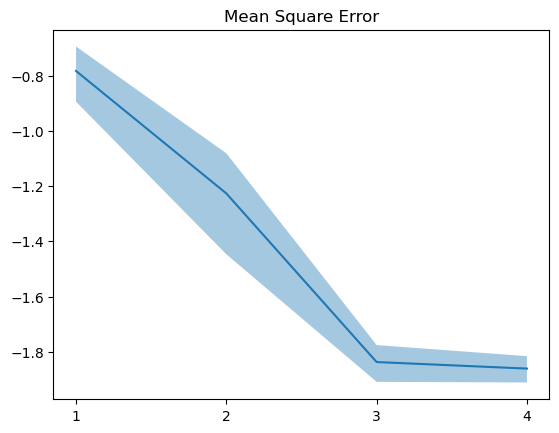

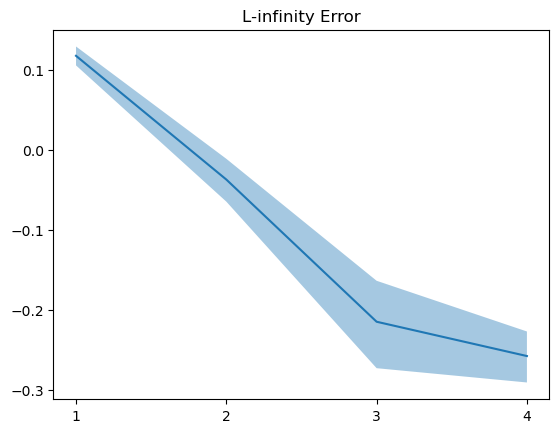

In [3]:
from Training.training import train
from error_test.disc_error import error_annulus

MSE_history = torch.zeros([n_experiments, n_experiments_rep, rounds])
L_inf_error_history = torch.zeros([n_experiments, n_experiments_rep, rounds])
run_times = torch.zeros([n_experiments, n_experiments_rep])

for j in range(n_experiments):

    for k in range(n_experiments_rep):
            
        if distr_list[j] == 0:
            domain = data_gen_ball_unif(radii, dim_list[j])
        elif distr_list[j] == 1:
            domain = data_gen_ball(radii, dim_list[j])
        else:
            domain == None
        
        if len(arch_list[j]) == 2:        
            NN = FCFF_3L([dim_list[j]] + arch_list[j])
        else:
            NN = FCFF_4L([dim_list[j]] + arch_list[j])
    
        training_params['optimizer'] = optim.SGD(NN.parameters(), lr = .02, momentum = .2)
    
        time = 0.
        
        for i in range(rounds):
            
            training_params['alpha'] = alpha_list[j][i]
            training_params['delta'] = delta_list[j][i]
            
            training_params['n_coloc_points'] = N_col_list[j][i]
            training_params['n_boundary_points'] = N_b_list[j][i]
            training_params['num_iterations'] = num_iterations_list[j][i]
            
            t0 = t()
            total_loss, PDE_loss, boundary_loss = train(NN, domain, training_params)
            time += t() - t0
            
            MC_points = int(1e6) # Number of grid points for comparison with the ground truth
            MSE, L_inf = error_annulus(NN, radii, MC_points)
            
            MSE_history[j,k,i] = MSE
            L_inf_error_history[j,k,i] = L_inf
        
        run_times[j, k] = time
        X_axis = 0
        Y_axis = 1
        
        n_theta = 100
        n_r = 100
        plot_2d_proj_disc(X_axis, Y_axis, NN, n_theta, n_r, radii)
        
    plt.plot(np.arange(rounds), MSE_history[j].mean(0).log10())
    plt.fill_between(np.arange(rounds),
                     (MSE_history[j].mean(0) - MSE_history[j].std(0)).log10(),
                     (MSE_history[j].mean(0) + MSE_history[j].std(0)).log10(),
                     alpha = .4
                    )
    plt.xticks([i for i in range(rounds)], [i+1 for i in range(rounds)])
    plt.title('Mean Square Error')
    plt.show()
    
    plt.plot(np.arange(rounds), L_inf_error_history[j].mean(0).log10())
    plt.fill_between(np.arange(rounds),
                     (L_inf_error_history[j].mean(0) - L_inf_error_history[j].std(0)).log10(),
                     (L_inf_error_history[j].mean(0) + L_inf_error_history[j].std(0)).log10(),
                     alpha = .4
                    )
    plt.xticks([i for i in range(rounds)], [i+1 for i in range(rounds)])
    plt.title('L-infinity Error')
    plt.show()

MSE_average = MSE_history.mean(1)
MSE_std = MSE_history.std(1)

Linf_average = L_inf_error_history.mean(1)
Linf_std = L_inf_error_history.std(1)

run_time_avg = run_times.mean(1) 

In [4]:
run_time_avg = run_times.mean(1) 

import pandas as pd
import numpy as np

distr_list_tab = []

for i in range(len(distr_list)):
    if distr_list[i]==0:
        distr_list_tab.append('Unif.')
    elif distr_list[i]==1:
        distr_list_tab.append('Rad.')
    

training_features = pd.DataFrame({'Dimension': dim_list,
                               'Distribution': distr_list_tab,
                               'Architecture': arch_list,
                               'delta': delta_list,
                               'alpha': alpha_list,
                               'N': N_col_list,
                               'N_b': N_b_list,
                               'Iterations': num_iterations_list})

run_T = pd.DataFrame({'Runtime (s)': np.array(run_time_avg)}).astype('int')

results_MSE = pd.DataFrame(np.array(MSE_average))
results_Linf = pd.DataFrame(np.array(Linf_average))


display('Mean Square Error', training_features.join(results_MSE).join(run_T).transpose())
display('L-infinity Error', training_features.join(results_Linf).join(run_T).transpose())


#One table

MSE = np.array(MSE_history[:,:,-1])
L_inf_error = np.array(L_inf_error_history[:,:,-1])

data_MSE = pd.DataFrame(MSE.transpose())
means_MSE = data_MSE.mean()
stds_MSE = data_MSE.std()

data_Linf = pd.DataFrame(L_inf_error.transpose())
means_Linf = data_Linf.mean()
stds_Linf = data_Linf.std()

summary_df = pd.DataFrame({
    'MSE': means_MSE.round(3).astype(str) + ' ± ' + stds_MSE.round(3).astype(str),
    'L_inf': means_Linf.round(3).astype(str) + ' ± ' + stds_Linf.round(3).astype(str)
})

display(training_features.join(summary_df).join(run_T).transpose())

'Mean Square Error'

0                         1  \
Dimension                            5                         5   
Distribution                      Rad.                      Rad.   
Architecture                  [40, 40]              [40, 40, 40]   
delta            [0.7, 0.3, 0.1, 0.05]     [0.7, 0.3, 0.1, 0.05]   
alpha             [2.5, 2.0, 1.0, 0.5]      [2.5, 2.0, 1.0, 0.5]   
N                 [200, 200, 200, 200]      [200, 200, 200, 200]   
N_b                   [80, 80, 80, 80]          [80, 80, 80, 80]   
Iterations    [1500, 1500, 1500, 1500]  [1500, 1500, 1500, 1500]   
0                             0.231808                  0.142352   
1                             0.038651                  0.044246   
2                             0.012148                  0.007503   
3                             0.019419                   0.00913   
Runtime (s)                         62                        90   

                                     2                         3  \
Dimension                            5                        10   
Distribution                      Rad.                      Rad.   
Architecture              [40, 40, 40]                  [60, 60]   
delta            [0.7, 0.3, 0.1, 0.05]     [0.7, 0.3, 0.1, 0.05]   
alpha             [2.5, 2.0, 1.0, 0.5]      [2.5, 2.0, 1.0, 0.5]   
N                 [200, 200, 200, 200]      [200, 200, 200, 200]   
N_b                   [80, 80, 80, 80]          [80, 80, 80, 80]   
Iterations    [1500, 2000, 2500, 3000]  [2500, 2500, 2500, 2500]   
0                             0.170162                  0.254914   
1                             0.027787                  0.073393   
2                             0.005679                  0.029083   
3                             0.012324                  0.026466   
Runtime (s)                        135                        80   

                                     4                         5  
Dimension                           10                        10  
Distribution                      Rad.                      Rad.  
Architecture              [60, 60, 60]              [60, 60, 60]  
delta            [0.7, 0.3, 0.1, 0.05]     [0.7, 0.3, 0.1, 0.05]  
alpha             [2.5, 2.0, 1.0, 0.5]      [2.5, 2.0, 1.0, 0.5]  
N                 [200, 200, 200, 200]      [200, 200, 200, 200]  
N_b                   [80, 80, 80, 80]          [80, 80, 80, 80]  
Iterations    [2500, 2500, 2500, 2500]  [2500, 3000, 3500, 5000]  
0                             0.168153                  0.164712  
1                             0.078094                  0.059354  
2                             0.024545                  0.014557  
3                             0.015466                  0.013785  
Runtime (s)                        103                       137

'L-infinity Error'

0                         1  \
Dimension                            5                         5   
Distribution                      Rad.                      Rad.   
Architecture                  [40, 40]              [40, 40, 40]   
delta            [0.7, 0.3, 0.1, 0.05]     [0.7, 0.3, 0.1, 0.05]   
alpha             [2.5, 2.0, 1.0, 0.5]      [2.5, 2.0, 1.0, 0.5]   
N                 [200, 200, 200, 200]      [200, 200, 200, 200]   
N_b                   [80, 80, 80, 80]          [80, 80, 80, 80]   
Iterations    [1500, 1500, 1500, 1500]  [1500, 1500, 1500, 1500]   
0                             1.165089                  0.946129   
1                             0.645829                  0.542643   
2                             0.517892                  0.383244   
3                             0.610792                  0.434188   
Runtime (s)                         62                        90   

                                     2                         3  \
Dimension                            5                        10   
Distribution                      Rad.                      Rad.   
Architecture              [40, 40, 40]                  [60, 60]   
delta            [0.7, 0.3, 0.1, 0.05]     [0.7, 0.3, 0.1, 0.05]   
alpha             [2.5, 2.0, 1.0, 0.5]      [2.5, 2.0, 1.0, 0.5]   
N                 [200, 200, 200, 200]      [200, 200, 200, 200]   
N_b                   [80, 80, 80, 80]          [80, 80, 80, 80]   
Iterations    [1500, 2000, 2500, 3000]  [2500, 2500, 2500, 2500]   
0                             0.993507                  1.499019   
1                             0.500935                  1.039137   
2                             0.358872                  0.814156   
3                             0.396323                  0.796614   
Runtime (s)                        135                        80   

                                     4                         5  
Dimension                           10                        10  
Distribution                      Rad.                      Rad.  
Architecture              [60, 60, 60]              [60, 60, 60]  
delta            [0.7, 0.3, 0.1, 0.05]     [0.7, 0.3, 0.1, 0.05]  
alpha             [2.5, 2.0, 1.0, 0.5]      [2.5, 2.0, 1.0, 0.5]  
N                 [200, 200, 200, 200]      [200, 200, 200, 200]  
N_b                   [80, 80, 80, 80]          [80, 80, 80, 80]  
Iterations    [2500, 2500, 2500, 2500]  [2500, 3000, 3500, 5000]  
0                             1.311142                  1.310208  
1                             0.923499                  0.917749  
2                             0.659066                  0.609598  
3                             0.607866                  0.552305  
Runtime (s)                        103                       137

0                         1  \
Dimension                            5                         5   
Distribution                      Rad.                      Rad.   
Architecture                  [40, 40]              [40, 40, 40]   
delta            [0.7, 0.3, 0.1, 0.05]     [0.7, 0.3, 0.1, 0.05]   
alpha             [2.5, 2.0, 1.0, 0.5]      [2.5, 2.0, 1.0, 0.5]   
N                 [200, 200, 200, 200]      [200, 200, 200, 200]   
N_b                   [80, 80, 80, 80]          [80, 80, 80, 80]   
Iterations    [1500, 1500, 1500, 1500]  [1500, 1500, 1500, 1500]   
MSE                      0.019 ± 0.007             0.009 ± 0.003   
L_inf                    0.611 ± 0.092             0.434 ± 0.078   
Runtime (s)                         62                        90   

                                     2                         3  \
Dimension                            5                        10   
Distribution                      Rad.                      Rad.   
Architecture              [40, 40, 40]                  [60, 60]   
delta            [0.7, 0.3, 0.1, 0.05]     [0.7, 0.3, 0.1, 0.05]   
alpha             [2.5, 2.0, 1.0, 0.5]      [2.5, 2.0, 1.0, 0.5]   
N                 [200, 200, 200, 200]      [200, 200, 200, 200]   
N_b                   [80, 80, 80, 80]          [80, 80, 80, 80]   
Iterations    [1500, 2000, 2500, 3000]  [2500, 2500, 2500, 2500]   
MSE                      0.012 ± 0.013             0.026 ± 0.003   
L_inf                    0.396 ± 0.054             0.797 ± 0.043   
Runtime (s)                        135                        80   

                                     4                         5  
Dimension                           10                        10  
Distribution                      Rad.                      Rad.  
Architecture              [60, 60, 60]              [60, 60, 60]  
delta            [0.7, 0.3, 0.1, 0.05]     [0.7, 0.3, 0.1, 0.05]  
alpha             [2.5, 2.0, 1.0, 0.5]      [2.5, 2.0, 1.0, 0.5]  
N                 [200, 200, 200, 200]      [200, 200, 200, 200]  
N_b                   [80, 80, 80, 80]          [80, 80, 80, 80]  
Iterations    [2500, 2500, 2500, 2500]  [2500, 3000, 3500, 5000]  
MSE                      0.015 ± 0.004             0.014 ± 0.002  
L_inf                    0.608 ± 0.059              0.552 ± 0.04  
Runtime (s)                        103                       137

In [5]:
print(training_features[['Dimension', 'Distribution', 'Architecture', 'Iterations']].join(summary_df).join(run_T).to_latex())

\begin{tabular}{lrlllllr}
\toprule
 & Dimension & Distribution & Architecture & Iterations & MSE & L_inf & Runtime (s) \\
\midrule
0 & 5 & Rad. & [40, 40] & [1500, 1500, 1500, 1500] & 0.019 ± 0.007 & 0.611 ± 0.092 & 62 \\
1 & 5 & Rad. & [40, 40, 40] & [1500, 1500, 1500, 1500] & 0.009 ± 0.003 & 0.434 ± 0.078 & 90 \\
2 & 5 & Rad. & [40, 40, 40] & [1500, 2000, 2500, 3000] & 0.012 ± 0.013 & 0.396 ± 0.054 & 135 \\
3 & 10 & Rad. & [60, 60] & [2500, 2500, 2500, 2500] & 0.026 ± 0.003 & 0.797 ± 0.043 & 80 \\
4 & 10 & Rad. & [60, 60, 60] & [2500, 2500, 2500, 2500] & 0.015 ± 0.004 & 0.608 ± 0.059 & 103 \\
5 & 10 & Rad. & [60, 60, 60] & [2500, 3000, 3500, 5000] & 0.014 ± 0.002 & 0.552 ± 0.04 & 137 \\
\bottomrule
\end{tabular}



<>:19: SyntaxWarning: invalid escape sequence '\l'
<>:39: SyntaxWarning: invalid escape sequence '\l'
<>:19: SyntaxWarning: invalid escape sequence '\l'
<>:39: SyntaxWarning: invalid escape sequence '\l'
C:\Users\usuario\AppData\Local\Temp\ipykernel_20340\1596278041.py:19: SyntaxWarning: invalid escape sequence '\l'
  plt.title('$\log_{10} (MSE)$', fontsize = 'xx-large')
C:\Users\usuario\AppData\Local\Temp\ipykernel_20340\1596278041.py:39: SyntaxWarning: invalid escape sequence '\l'
  plt.title('$\log_{10} (E_{\infty})$', fontsize = 'xx-large')


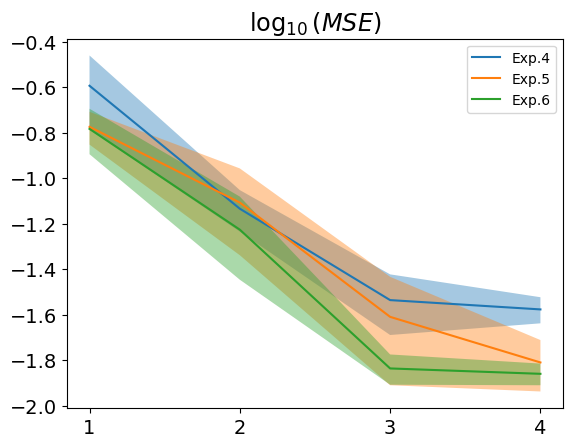

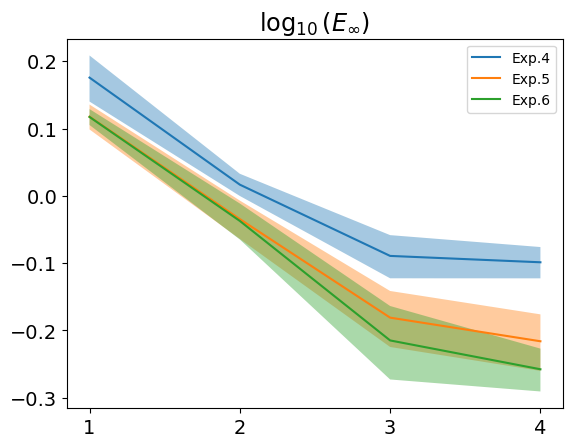

In [6]:
from mpl_toolkits.axes_grid1 import host_subplot

ax = host_subplot(111)
for i in range(3,6):
    x = np.arange(rounds) + 1
    
    text = 'Exp.' + str(i+1)
    
    ax.plot(x, 
            MSE_history[i].mean(0).log10(), 
            label = text)
    ax.fill_between(x,
                   (MSE_history[i].mean(0) - MSE_history[i].std(0)).log10(),
                   (MSE_history[i].mean(0) + MSE_history[i].std(0)).log10(),
                   alpha = .4)
    ax.set_xticks(x)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
plt.title('$\log_{10} (MSE)$', fontsize = 'xx-large')
plt.legend()
plt.show()

ax = host_subplot(111)
for i in range(3,6):
    L_inf_log10 = torch.log10(L_inf_error_history[i])
    
    text = 'Exp.' + str(i+1)
    
    ax.plot(x,
            L_inf_error_history[i].mean(0).log10(), 
            label = text)
    ax.fill_between(x,
                   (L_inf_error_history[i].mean(0) - L_inf_error_history[i].std(0)).log10(),
                   (L_inf_error_history[i].mean(0) + L_inf_error_history[i].std(0)).log10(),
                   alpha = .4)
    ax.set_xticks(x)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
plt.title('$\log_{10} (E_{\infty})$', fontsize = 'xx-large')
plt.legend()
plt.show()